In [ ]:
import tensorflow as tf 

from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.layers.experimental import preprocessing

print("Current TensorFlow version is", tf.__version__)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42) 

# Read in the data as adult dataframe. 
adult = pd.read_csv("https://raw.githubusercontent.com/rohithkuna/Rohith-IT_533/main/rohith%20dm%20dataset.csv")
adult.head() #USE YOUR OWN ADULT DATA FILE ON GITHUB

Current TensorFlow version is 2.8.2


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000,8/11/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000,9/2/2017 4:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000,1/12/2013 0:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000,3/17/2012 3:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,19500,7/4/2015 8:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
adult_dl = pd.DataFrame(adult, columns = ['goal', 'pledged', 'backers','usd_pledged_real','state'])
adult_dl.head()

,goal,pledged,backers,usd_pledged_real,state
0,1000,0.0,0,0.0,failed
1,30000,2421.0,15,2421.0,failed
2,45000,220.0,3,220.0,failed
3,5000,1.0,1,1.0,failed
4,19500,1283.0,14,1283.0,canceled


In [ ]:
adult_dl.state.unique()

array(['failed', 'canceled', 'successful', 'live'], dtype=object)

In [ ]:
adult_dl = pd.get_dummies(adult_dl, columns=['state'], prefix='', prefix_sep='')
adult_dl.head()

,goal,pledged,backers,usd_pledged_real,canceled,failed,live,successful
0,1000,0.0,0,0.0,0,1,0,0
1,30000,2421.0,15,2421.0,0,1,0,0
2,45000,220.0,3,220.0,0,1,0,0
3,5000,1.0,1,1.0,0,1,0,0
4,19500,1283.0,14,1283.0,1,0,0,0


In [ ]:
train_dataset = adult_dl.sample(frac=0.8, random_state=0)

In [ ]:
train_dataset = adult_dl.sample(frac=0.8, random_state=0)
test_dataset = adult_dl.drop(train_dataset.index)

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('pledged')
test_labels = test_features.pop('pledged')

In [ ]:
normalizer = preprocessing.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[[1.8742402e+04 1.1510924e+02 8.5981826e+03 5.8823530e-02 5.1260507e-01
  8.4033608e-03 4.2016804e-01]]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('Original data:', first)
  print()
  print('Normalized data:', normalizer(first).numpy())

Original data: [[4000.     12.    322.02    0.      1.      0.      0.  ]]

Normalized data: [[-0.36 -0.33 -0.39 -0.25  0.98 -0.09 -0.85]]


In [ ]:
goal_new = np.array(train_features['goal'])

goal_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
goal_normalizer.adapt(goal_new)

In [ ]:
goal_model = tf.keras.Sequential([
    goal_normalizer,
    layers.Dense(units=1)
])

goal_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
goal_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = goal_model.fit(
    train_features['goal'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data. Validation means that we test as we go, on a 20% subset of the training data
    validation_split = 0.2)

CPU times: user 2.63 s, sys: 98.4 ms, total: 2.72 s
Wall time: 2.69 s


In [ ]:
x = tf.linspace(0.0, 250, 251)
y = goal_model.predict(x)

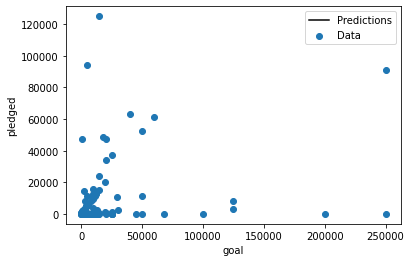

In [ ]:
def plot_goal(x, y):
  plt.scatter(train_features['goal'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('goal')
  plt.ylabel('pledged')
  plt.legend()
plot_goal(x,y) 

In [ ]:
test_results = {}

test_results['goal_model'] = goal_model.evaluate(
    test_features['goal'],
    test_labels, verbose=0)

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(7, 1) dtype=float32, numpy=
array([[ 0.20645529],
       [-0.64183027],
       [-0.7893623 ],
       [-0.33005667],
       [ 0.6383675 ],
       [ 0.3801338 ],
       [-0.33601624]], dtype=float32)>

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # 10 epochs, so we turn on logging
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/100
3/3 [==============================] - 1s 116ms/step - loss: 8060.9058 - val_loss: 9722.4014
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 8060.4883 - val_loss: 9721.9854
Epoch 3/100
3/3 [==============================] - 0s 25ms/step - loss: 8060.0752 - val_loss: 9721.6729
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 8059.7422 - val_loss: 9721.3447
Epoch 5/100
3/3 [==============================] - 0s 27ms/step - loss: 8059.3486 - val_loss: 9721.0391
Epoch 6/100
3/3 [==============================] - 0s 24ms/step - loss: 8059.0078 - val_loss: 9720.7764
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 8058.7314 - val_loss: 9720.5225
Epoch 8/100
3/3 [==============================] - 0s 23ms/step - loss: 8058.3896 - val_loss: 9720.2432
Epoch 9/100
3/3 [==============================] - 0s 32ms/step - loss: 8058.0908 - val_loss: 9719.9854
Epoch 10/100
3/3 [==============================] - 0s 24ms/ste

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([                 # Here you are setting up the keras.Sequential architecture
      norm,                                  # This is the normalizer function we built before
      layers.Dense(64, activation='relu'),   # Here is the first hidden layer--64 nodes, built with the relu function
      layers.Dense(64, activation='relu'),   # Here is the second hidden layer, also built with the relu function
      layers.Dense(1)                        # Here is the Dense layer for a single output because we are working on a REGRESSION
  ])                                         # AND WE'RE DONE WITH BUILDING THE MODEL!

  model.compile(loss='mean_absolute_error',   # Now we configure the runtime for our model; the loss function is mean absolute error--makes sense for a regression!
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_goal_model = build_and_compile_model(goal_normalizer)

In [ ]:
dnn_goal_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
%%time
history = dnn_goal_model.fit(
    train_features['goal'], train_labels,
    validation_split=0.2,
    verbose=1, epochs=10)

Epoch 1/10
3/3 [==============================] - 1s 216ms/step - loss: 8060.6055 - val_loss: 9722.2900
Epoch 2/10
3/3 [==============================] - 0s 40ms/step - loss: 8060.5562 - val_loss: 9722.2441
Epoch 3/10
3/3 [==============================] - 0s 45ms/step - loss: 8060.4985 - val_loss: 9722.1982
Epoch 4/10
3/3 [==============================] - 0s 57ms/step - loss: 8060.4492 - val_loss: 9722.1494
Epoch 5/10
3/3 [==============================] - 0s 58ms/step - loss: 8060.3975 - val_loss: 9722.0986
Epoch 6/10
3/3 [==============================] - 0s 58ms/step - loss: 8060.3462 - val_loss: 9722.0430
Epoch 7/10
3/3 [==============================] - 0s 34ms/step - loss: 8060.2900 - val_loss: 9721.9805
Epoch 8/10
3/3 [==============================] - 0s 25ms/step - loss: 8060.2217 - val_loss: 9721.9111
Epoch 9/10
3/3 [==============================] - 0s 50ms/step - loss: 8060.1475 - val_loss: 9721.8369
Epoch 10/10
3/3 [==============================] - 0s 44ms/step - loss: 

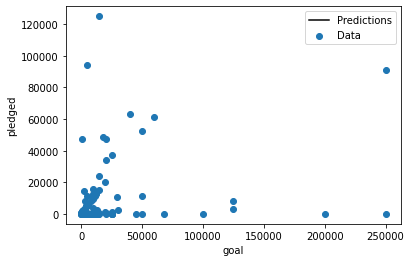

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_goal_model.predict(x)

plot_goal(x, y)

In [ ]:
test_results['dnn_goal_model'] = dnn_goal_model.evaluate(
    test_features['goal'], test_labels,
    verbose=0)

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 7)                15        
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                512       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,752
Trainable params: 4,737
Non-trainable params: 15
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=1, epochs=10)

Epoch 1/10
3/3 [==============================] - 1s 308ms/step - loss: 8060.4033 - val_loss: 9722.1123
Epoch 2/10
3/3 [==============================] - 0s 26ms/step - loss: 8060.2671 - val_loss: 9722.0088
Epoch 3/10
3/3 [==============================] - 0s 21ms/step - loss: 8060.1514 - val_loss: 9721.9023
Epoch 4/10
3/3 [==============================] - 0s 24ms/step - loss: 8060.0000 - val_loss: 9721.7930
Epoch 5/10
3/3 [==============================] - 0s 26ms/step - loss: 8059.8677 - val_loss: 9721.6787
Epoch 6/10
3/3 [==============================] - 0s 25ms/step - loss: 8059.7144 - val_loss: 9721.5576
Epoch 7/10
3/3 [==============================] - 0s 27ms/step - loss: 8059.5547 - val_loss: 9721.4346
Epoch 8/10
3/3 [==============================] - 0s 27ms/step - loss: 8059.3921 - val_loss: 9721.3086
Epoch 9/10
3/3 [==============================] - 0s 28ms/step - loss: 8059.2173 - val_loss: 9721.1719
Epoch 10/10
3/3 [==============================] - 0s 27ms/step - loss: 

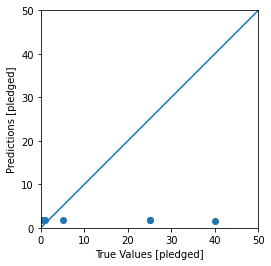

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [pledged]')
plt.ylabel('Predictions [pledged]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [pledged]']).T

,Mean absolute error [pledged]
goal_model,4828.419922
linear_model,4823.018066
dnn_goal_model,4845.943359
dnn_model,4845.020020
